In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
combined_out_fpath = '/Users/loganesian/git_repos/cs699_dynamics_of_representation_learning/domain_shift/pretrained_models_combined'
combined_out_fname = 'bayesian_ensembling_number_of_models'

In [24]:
### These values were saved out in a json file and copied here manually since there were that many files.
single_erm_eval_res = defaultdict(list)
# Seeds 0 - 4 trained weights in order.
single_erm_eval_res['ID_VAL'] = [0.807, 0.8704, 0.87038, 0.9377, 0.89869]
single_erm_eval_res['OOD_VAL'] = [0.888, 0.8954, 0.895415, 0.856733, 0.875072]
single_erm_eval_res['TEST'] = [0.625, 0.7047619, 0.704762, 0.626925, 0.7418]

bayesian_res = defaultdict(dict)
bayesian_res['population_vote_2'] = defaultdict(list)
bayesian_res['population_vote_2']['ID_VAL'] = [0.776818, 0.7768176, 0.8006555, 0.805125177, 0.87038141489,
                                              0.8560786843, 0.826877236366, 0.8560786843, 0.826877236366,
                                              0.8825983405]
bayesian_res['population_vote_2']['OOD_VAL'] = [0.902865, 0.90286535, 0.8853868, 0.89484238625, 0.89541548490,
                                               0.88825213909, 0.89885383844, 0.88825213909, 0.898853838444,
                                               0.87392550707]
bayesian_res['population_vote_2']['TEST'] = [0.63269, 0.6326867, 0.59870666, 0.6313933134, 0.70476192,
                                                0.612815976, 0.704644322395,  0.6128159761, 0.704644322395,
                                                0.640446782112]

bayesian_res['population_vote_3'] = defaultdict(list)
bayesian_res['population_vote_3']['ID_VAL'] = [0.87038, 0.8900476, 0.8569726, 0.89004767, 0.8569725752,
                                              0.890047669, 0.870381414890, 0.870381414890, 0.9296782017]
bayesian_res['population_vote_3']['OOD_VAL'] = [0.89542, 0.89140403, 0.88796562, 0.891404033, 0.88796561956,
                                               0.8793696165, 0.70476192236, 0.89541548491, 0.881661891937]
bayesian_res['population_vote_3']['TEST'] = [0.7047619, 0.6451499, 0.7012346, 0.6451499, 0.7012345791,
                                                0.66913581, 0.8954154849, 0.70476192236, 0.72239857912]

bayesian_res['population_vote_4'] = defaultdict(list)
bayesian_res['population_vote_4']['ID_VAL'] = [0.861144, 0.82777, 0.8504171, 0.850417, 0.86501789,
                                              0.929678201675]
bayesian_res['population_vote_4']['OOD_VAL'] = [0.8985673, 0.8974212, 0.8928367, 0.89283669, 0.8974211812,
                                               0.881661891937]
bayesian_res['population_vote_4']['TEST'] = [0.645973, 0.703586, 0.64961785, 0.649617851, 0.69970607758,
                                                0.72239857912]

bayesian_res['population_vote_5'] = defaultdict(list)
bayesian_res['population_vote_5']['ID_VAL'] = [0.893325]
bayesian_res['population_vote_5']['OOD_VAL'] = [0.890831]
bayesian_res['population_vote_5']['TEST'] = [0.6998236]

In [20]:
print(ttl_seeds)

5


In [27]:
single_erm_eval_res['TEST']

[0.625, 0.7047619, 0.704762, 0.626925, 0.7418]

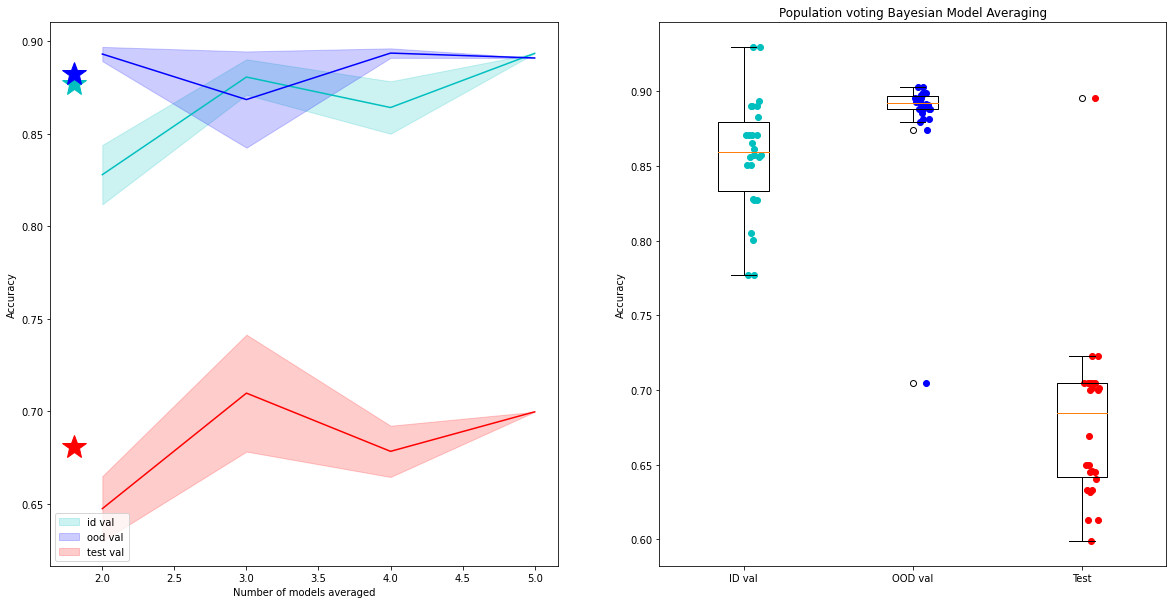

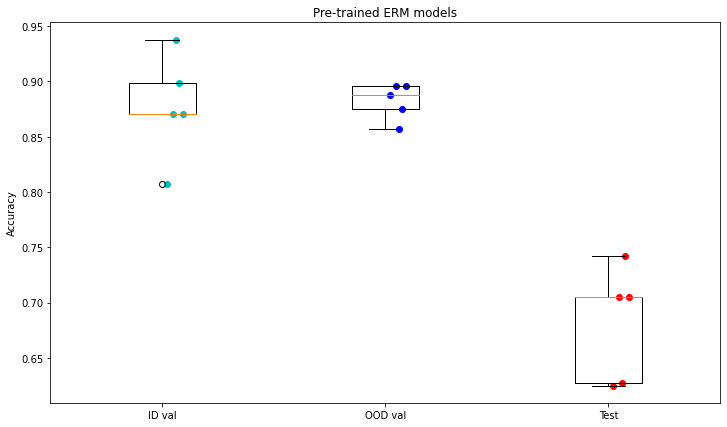

In [61]:
cmap = {'ID': 'c', 'OOD': 'b', 'TEST': 'r'}
x_ticks = np.arange(2, 6)
ttl_seeds = len(single_erm_eval_res['ID_VAL'])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
id_val_mean = np.mean(single_erm_eval_res['ID_VAL'])
ax[0].plot([1.8], id_val_mean, marker='*', color=cmap['ID'], markersize=25)
ood_val_mean = np.mean(single_erm_eval_res['OOD_VAL'])
ax[0].plot([1.8], ood_val_mean, marker='*', color=cmap['OOD'], markersize=25)
test_val_mean = np.mean(single_erm_eval_res['TEST'])
ax[0].plot([1.8], test_val_mean, marker='*', color=cmap['TEST'], markersize=25)

bay_id_mean = []
bay_id_stderr = []
bay_ood_mean = []
bay_ood_stderr = []
bay_test_mean = []
bay_test_stderr = []

bay_id_mean.append(np.mean(bayesian_res['population_vote_2']['ID_VAL']))
bay_id_stderr.append(np.std(bayesian_res['population_vote_2']['ID_VAL']) / np.sqrt(ttl_seeds))
bay_ood_mean.append(np.mean(bayesian_res['population_vote_2']['OOD_VAL']))
bay_ood_stderr.append(np.std(bayesian_res['population_vote_2']['OOD_VAL']) / np.sqrt(ttl_seeds))
bay_test_mean.append(np.mean(bayesian_res['population_vote_2']['TEST']))
bay_test_stderr.append(np.std(bayesian_res['population_vote_2']['TEST']) / np.sqrt(ttl_seeds))

bay_id_mean.append(np.mean(bayesian_res['population_vote_3']['ID_VAL']))
bay_id_stderr.append(np.std(bayesian_res['population_vote_3']['ID_VAL']) / np.sqrt(ttl_seeds))
bay_ood_mean.append(np.mean(bayesian_res['population_vote_3']['OOD_VAL']))
bay_ood_stderr.append(np.std(bayesian_res['population_vote_3']['OOD_VAL']) / np.sqrt(ttl_seeds))
bay_test_mean.append(np.mean(bayesian_res['population_vote_3']['TEST']))
bay_test_stderr.append(np.std(bayesian_res['population_vote_3']['TEST']) / np.sqrt(ttl_seeds))

bay_id_mean.append(np.mean(bayesian_res['population_vote_4']['ID_VAL']))
bay_id_stderr.append(np.std(bayesian_res['population_vote_4']['ID_VAL']) / np.sqrt(ttl_seeds))
bay_ood_mean.append(np.mean(bayesian_res['population_vote_4']['OOD_VAL']))
bay_ood_stderr.append(np.std(bayesian_res['population_vote_4']['OOD_VAL']) / np.sqrt(ttl_seeds))
bay_test_mean.append(np.mean(bayesian_res['population_vote_4']['TEST']))
bay_test_stderr.append(np.std(bayesian_res['population_vote_4']['TEST']) / np.sqrt(ttl_seeds))

bay_id_mean.append(np.mean(bayesian_res['population_vote_5']['ID_VAL']))
bay_id_stderr.append(np.std(bayesian_res['population_vote_5']['ID_VAL']) / np.sqrt(ttl_seeds))
bay_ood_mean.append(np.mean(bayesian_res['population_vote_5']['OOD_VAL']))
bay_ood_stderr.append(np.std(bayesian_res['population_vote_5']['OOD_VAL']) / np.sqrt(ttl_seeds))
bay_test_mean.append(np.mean(bayesian_res['population_vote_5']['TEST']))
bay_test_stderr.append(np.std(bayesian_res['population_vote_5']['TEST']) / np.sqrt(ttl_seeds))

ax[0].plot(x_ticks, bay_id_mean, color=cmap['ID'])
ax[0].fill_between(x_ticks, np.array(bay_id_mean) - np.array(bay_id_stderr),
                   np.array(bay_id_mean) + np.array(bay_id_stderr), alpha=0.2, color=cmap['ID'], label='id val')
ax[0].plot(x_ticks, bay_ood_mean, color=cmap['OOD'])
ax[0].fill_between(x_ticks, np.array(bay_ood_mean) - np.array(bay_ood_stderr),
                   np.array(bay_ood_mean) + np.array(bay_ood_stderr), alpha=0.2, color=cmap['OOD'],
                   label='ood val')
ax[0].plot(x_ticks, bay_test_mean, color=cmap['TEST'])
ax[0].fill_between(x_ticks, np.array(bay_test_mean) - np.array(bay_test_stderr),
                   np.array(bay_test_mean) + np.array(bay_test_stderr), alpha=0.2, color=cmap['TEST'],
                   label='test val')
ax[0].legend()
ax[0].set_xlabel('Number of models averaged')
ax[0].set_ylabel('Accuracy')

idval_bayes_res = bayesian_res['population_vote_2']['ID_VAL'] + bayesian_res['population_vote_3']['ID_VAL'] +\
                  bayesian_res['population_vote_4']['ID_VAL'] + bayesian_res['population_vote_5']['ID_VAL']
oodval_bayes_res = bayesian_res['population_vote_2']['OOD_VAL'] + bayesian_res['population_vote_3']['OOD_VAL'] +\
                   bayesian_res['population_vote_4']['OOD_VAL'] + bayesian_res['population_vote_5']['OOD_VAL']
test_bayes_res = bayesian_res['population_vote_2']['TEST'] + bayesian_res['population_vote_3']['TEST'] +\
                 bayesian_res['population_vote_4']['TEST'] + bayesian_res['population_vote_5']['TEST']

boxplot_data = np.array([idval_bayes_res, oodval_bayes_res, test_bayes_res])

ax[1].boxplot(boxplot_data.T, labels=['ID val', 'OOD val', 'Test'])
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Population voting Bayesian Model Averaging')
disp = np.random.rand(len(idval_bayes_res)) * 0.1
ax[1].scatter(1 + disp, idval_bayes_res, color=cmap['ID'])
ax[1].scatter(2 + disp, oodval_bayes_res, color=cmap['OOD'])
ax[1].scatter(3 + disp, test_bayes_res, color=cmap['TEST'])

fig = plt.figure(figsize=(12, 7))
boxplot_data = np.array([
  single_erm_eval_res['ID_VAL'],
  single_erm_eval_res['OOD_VAL'],
  single_erm_eval_res['TEST']
])

plt.boxplot(boxplot_data.T, labels=['ID val', 'OOD val', 'Test'])
plt.ylabel('Accuracy')
plt.title('Pre-trained ERM models')
disp = np.random.rand(ttl_seeds) * 0.1
plt.scatter(1 + disp, single_erm_eval_res['ID_VAL'], color=cmap['ID'])
plt.scatter(2 + disp, single_erm_eval_res['OOD_VAL'], color=cmap['OOD'])
plt.scatter(3 + disp, single_erm_eval_res['TEST'], color=cmap['TEST'])

plt.show()